# Deep Learning with MNIST-CNN-one hot encoding

# Stage 1: Import dependencies for the project

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical #to handle one hot encoding for multiclass 
import random
from keras.layers import Dropout

#CNN specific

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

#the Model class api allowsus to define a model.It allows us to instantiate layers from pretrained models (effectively allows us to reuse previously trained model_)
from keras.models import Model

# Stage 2: Dataset preprocessing

In [2]:
np.random.seed(0)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
60000
(60000,)


In [3]:
#to verify our complex daaset is imported correctly

#code will run if conditions met else wont run and will print theerror messagethatwe have specified below

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

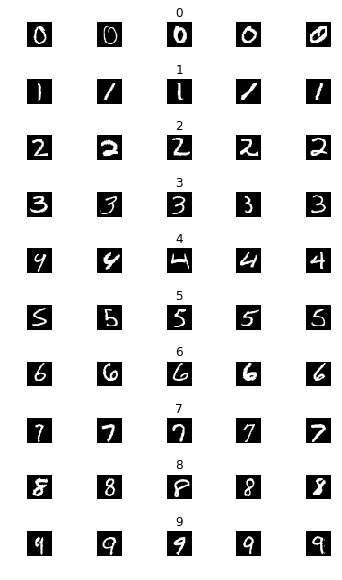

In [4]:
num_of_samples = []
 
cols = 5  #this is not fixed . we are just taking 5columns to see thevariations in mnist data for current label
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()  #plots can overlap. it will handle that issue and avoid plot overlap
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        #random.randint(0, len(x_selected - 1))-to select any of the 60000 images
        # :,:  used to define next 2 parameters means full slicing i.e 28,28 image size
        axs[j][i].axis("off")  #turning the axis off
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))  #appening the length of individual arrays

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

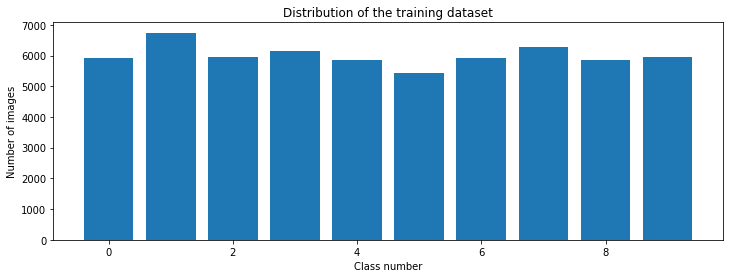

In [5]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

# 2.1 Reshaping of the dataset

In [6]:
#Here we are passing image of size 28*28 and of depth 1(as we are using gryscale image). While in ANN ,we reshaped the image ito 28*28=784. soour shape was (784,)
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# 2.2 one hot encoding

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2.3 Image normalization

In [8]:
X_train = X_train/255
X_test = X_test/255

# Stage 3: Building an Covolutional Neural network

In [9]:
# define the larger model
def leNet_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    
    #input_shape is required only for 1st lAYER
    #30=no of kernels/filters,(5,5) is size of kernel
    #input_shape=(28, 28, 1) ,specifies shape of input image
    #each filter is of 5*5 and we have 30 filters.
    #so total no of parameters here =25*30+30=780
    #padding=same, means output and input image have same shape.Default padding is valid , which means no padding
    #here the edges are blank and dont contain  image detail. so we are using default "valid" padding
    #if we are not specifying stride, it will be taken 1 as default stride
    
    #((n-k+2p)/s)+1
    #=((28-5+0)/1)+1=24. so output shape is (24,24)
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #24/2=12.so output shape is (12,12)
    
    model.add(Conv2D(15, (3, 3), activation='relu'))
    
    #15=no of kernels/filters,(3,3) is size of kernel
    #each filter is of 3*3 and we have 15 filters and 30 input kernels
    #so total no of parameters here =30*3*3*15+15=4065 no of parameters
    
    #((12-3+0)/1)+1=10.so output shape is (10,10)
    

    model.add(MaxPooling2D(pool_size=(2, 2)))  
    
    #10/2=5.so output shape is (5,5)
    
    model.add(Flatten())
    #15 input kernels and size 5*5.so output shape is 15*5*5=375
    
    model.add(Dense(500, activation='relu'))
    
    #total no of parameters here =375*500+500=188000
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    #total no of parameters here =500*10+10=5010
    
    
    # Compile model
    model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
model = leNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

# Stage 4: Training the model

In [11]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2234 - accuracy: 0.9297 - val_loss: 0.0517 - val_accuracy: 0.9827
Epoch 2/10
54000/54000 [==============================] - 62s 1ms/step - loss: 0.0693 - accuracy: 0.9793 - val_loss: 0.0517 - val_accuracy: 0.9845
Epoch 3/10
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.0353 - val_accuracy: 0.9897
Epoch 4/10
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0362 - val_accuracy: 0.9878
Epoch 5/10
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 6/10
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0383 - accuracy: 0.9880 - val_loss: 0.0409 - val_accuracy: 0.9887
Epoch 7/10
54000/54000 [==============================] - 62s 1ms/ste

Text(0.5,0,'epoch')

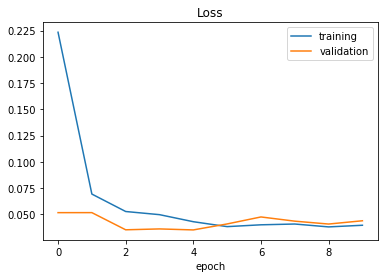

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

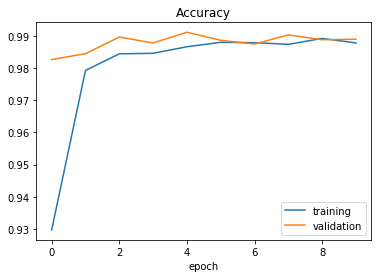

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Stage 5: Model evaluation and prediction

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.049703280800005814
Test accuracy: 0.9858999848365784


# Prediciting for a random test data

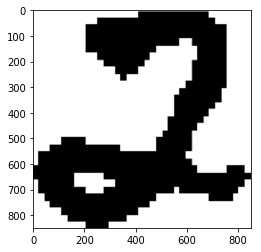

In [15]:
#predict internet number
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (850, 850, 4)
size of iamge after resize:  (28, 28, 4)
size of iamge after resize AND GRAYSCALE implementation:  (28, 28)


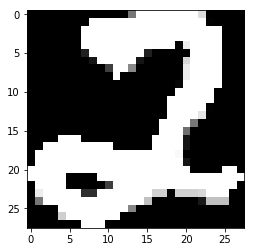

In [16]:
import cv2
 
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (28, 28))
print('size of iamge after resize: ',img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('size of iamge after resize AND GRAYSCALE implementation: ',img.shape)
#our image is trained on black background and data in white.But given image isof oppsite order. so we need to change that
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


In [17]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [18]:
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


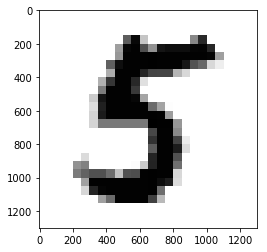

In [19]:
#predict internet number
import requests
from PIL import Image
url = 'https://blog.otoro.net/assets/20160401/png/mnist_input_0.png'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

size of iamge before resize:  (28, 28)
size of iamge after resize:  (28, 28)


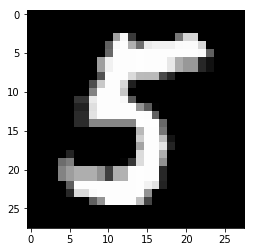

In [21]:
import cv2
 
img = np.asarray(img)
print('size of iamge before resize: ',img.shape)
img = cv2.resize(img, (28, 28))
print('size of iamge after resize: ',img.shape)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print('size of iamge after resize AND GRAYSCALE implementation: ',img.shape)
#our image is trained on black background and data in white.But given image isof oppsite order. so we need to change that
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 

In [22]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [23]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [5]


In [26]:
#1st parameter include all the inputs tour network.
#the 2nd parameter includes all the output parameters u want from the model
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)


visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


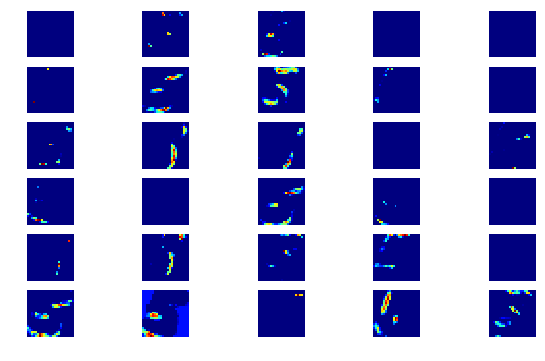

In [27]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

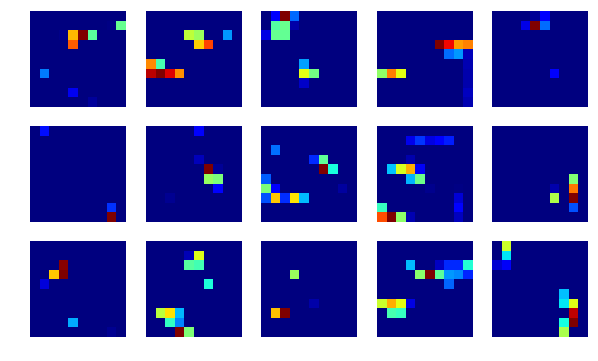

In [28]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')